## Exercício
Agora é hora de praticar!  
  
Os bancos obtêm uma receita importante com empréstimos concedidos. Mas muitas vezes está associado ao risco. O mutuário pode não pagar o empréstimo. Para mitigar esse problema, os bancos decidiram usar o Machine Learning para superar esse problema. Eles coletaram dados anteriores sobre os tomadores de empréstimos e gostariam que você desenvolvesse um modelo de ML forte para classificar se algum novo devedor provavelmente entrará em default ou não.  
  
O conjunto de dados é enorme e consiste em vários fatores determinísticos, como renda do mutuário, gênero, finalidade do empréstimo, etc. O conjunto de dados está sujeito a uma forte multicolinearidade e valores vazios. Você pode superar esses fatores e construir um classificador forte para prever inadimplentes?

Importe a base **Loan_Default.csv** que está em csv dentro do diretório **data**.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
emprestimos = pd.read_csv('./data/Loan_Default.csv', sep=',')

Verifique com a função .info os campos presentes na tabela

In [3]:
emprestimos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  interest_only              148670 non-null  object 
 13  lump_sum_payment           14

Imprima as estatísticas padrões do dataframe com a função .describe

In [4]:
emprestimos.describe()

,ID,year,loan_amount,rate_of_interest,property_value,income,Credit_Score,LTV,Status
count,148670.000000,148670.0,1.486700e+05,112231.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,4.978935e+05,6957.338876,699.789103,72.746457,0.246445
std,42917.476598,0.0,1.839093e+05,0.561391,3.599353e+05,6496.586382,115.875857,39.967603,0.430942
min,24890.000000,2019.0,1.650000e+04,0.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000


### Gráficos

In [33]:
emprestimos.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,construction_type,occupancy_type,income,credit_type,Credit_Score,age,submission_of_application,LTV,Region,Status
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,sb,pr,1740.0,EXP,758,25-34,to_inst,98.728814,south,1
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,sb,pr,4980.0,EQUI,552,55-64,to_inst,NaN,North,1
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,sb,pr,9480.0,EXP,834,35-44,to_inst,80.019685,south,0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,sb,pr,11880.0,EXP,587,45-54,not_inst,69.376900,North,0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,sb,pr,10440.0,CRIF,602,25-34,not_inst,91.886544,North,0


In [19]:
emprestimos.pivot_table(index='ID', values='loan_limit', columns='year', aggfunc=count)

NameError: name 'count' is not defined

1) Verifique sua variável de interesse (Status) como a contagem de distribuição

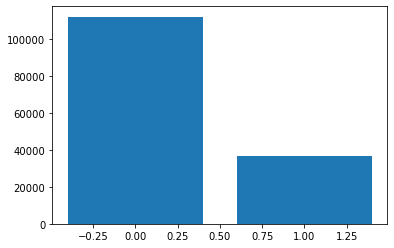

In [35]:
plt.bar(emprestimos.Status.value_counts().index,emprestimos.Status.value_counts().values);

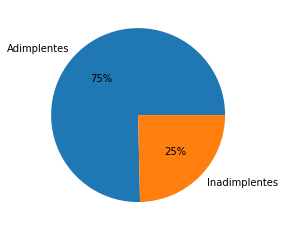

In [40]:
plt.pie(emprestimos.Status.value_counts(), autopct='%1.0f%%', labels=['Adimplentes','Inadimplentes']);

2) Construa um gráfico de barras que permita verificar a Bad Rate (média da coluna Status) por tipo de crédito oferecido (credit_type). 

In [43]:
media_tipo_credito = emprestimos.groupby('credit_type')[['Status']].mean()
media_tipo_credito.reset_index(inplace=True)
media_tipo_credito.rename({'Status':'bad_rate'}, inplace=True, axis=1)
media_tipo_credito

,credit_type,bad_rate
0,CIB,0.158041
1,CRIF,0.162343
2,EQUI,0.999935
3,EXP,0.159854


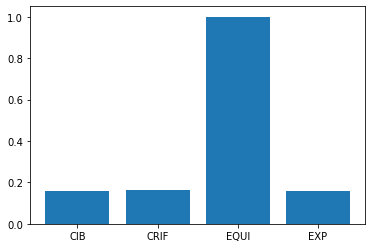

In [44]:
plt.bar(media_tipo_credito['credit_type'], media_tipo_credito['bad_rate']);

''

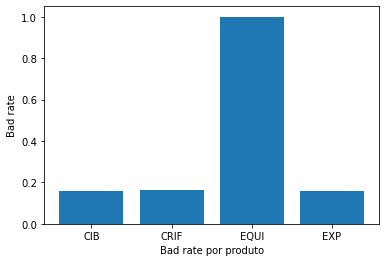

In [53]:
# outro modo de fazer
outro_modo = emprestimos.pivot_table(index='credit_type', values='Status')
outro_modo.reset_index(inplace=True)
plt.bar(outro_modo['credit_type'],outro_modo['Status'])
plt.ylabel('Bad rate')
plt.xlabel('Bad rate por produto')
;

3) Faça um gráfico de dispersão da Credit Score pela média do Status

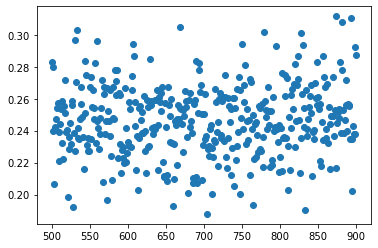

In [57]:
media_score = emprestimos.pivot_table(index='Credit_Score', values='Status', aggfunc='mean')
plt.scatter(media_score.index, media_score['Status']);

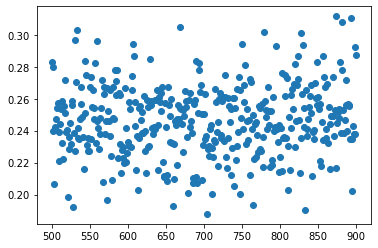

In [67]:
media_score_2 = emprestimos.groupby('Credit_Score')[['Status']].mean()
plt.scatter(media_score_2.index, media_score_2['Status']);

3) Por meio de um gráfico de dispersão, identifique o comportamento da média da variável de interesse (Status) por faixa etária

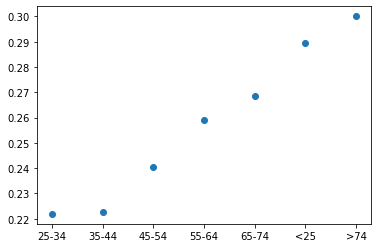

In [59]:
media_faixa_etaria = emprestimos.pivot_table(index='age', values='Status', aggfunc='mean')
plt.scatter(media_faixa_etaria.index, media_faixa_etaria['Status']);

4) Construa o histograma do montante de dívida (loan_amount) e verifique como está sua distribuição. Observe o mesmo com um gráfico boxplot.

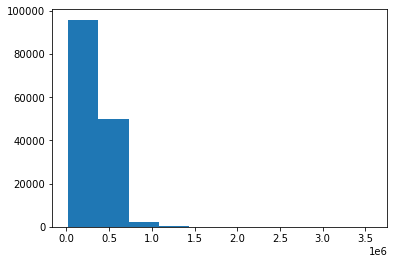

In [69]:
plt.hist(emprestimos['loan_amount']);

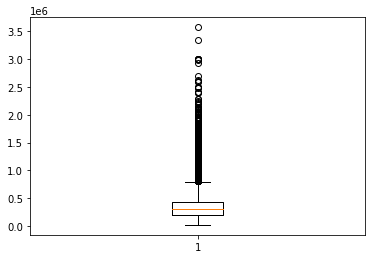

In [71]:
plt.boxplot(emprestimos['loan_amount']);

5) Como se encontra a distribuição das faixas-etárias nesta base de dados.  
*Obs.: utilize o gráfico de pizza*

In [89]:
teste = emprestimos.age.value_counts().index
teste = list(teste)
teste

['45-54', '35-44', '55-64', '65-74', '25-34', '>74', '<25']

''

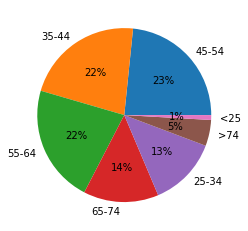

In [90]:
plt.pie(emprestimos.age.value_counts(), autopct='%1.0f%%', labels=teste)
;

''

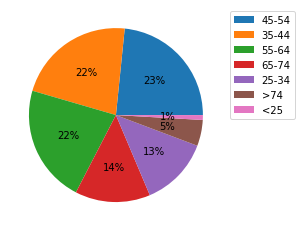

In [94]:
plt.pie(emprestimos.age.value_counts(), autopct='%1.0f%%')
plt.legend(emprestimos.age.value_counts().index, loc = 2, bbox_to_anchor = (1,1))
;